# Linear Regression

We're going to keep working with our timeseries SST data, however, after investigating the amplitude spectra and now that we know the frequency content of our data, we can play with calculating 'best fit' lines via linear regression.  This second goal of this lesson can be applied to time series, or any dataset that has a dependent and independent variable (SST and time in this case, SST and distance from a river would be another good example). 

Many of the skills outlined in this tutorial have been taken from the article [Linear Regression in Python by Real Python](https://realpython.com/linear-regression-in-python/).

In order to pick up roughly where we left off in the [Time Series tutorial](time_series.ipynb) - we'll reload the SST dataset and resample it - this should be quick:

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from scipy import signal

#Quickly import data with the datetime as the index:
sst = pd.read_csv('https://raw.githubusercontent.com/eoda-macs401/earth_ocean_data_analysis/main/data/ERSST_nearForks.csv',  parse_dates=[0], index_col=0)

<AxesSubplot:xlabel='Time'>

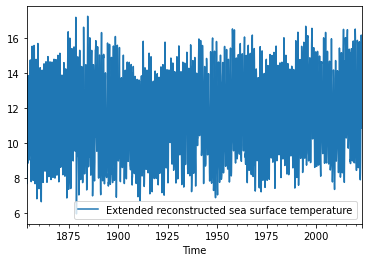

In [2]:
sst_reg = sst.resample("30D").ffill()
sst_reg.plot()

## Linear Regression

As metnioned above, you can take entire courses on regression techniques. It is a fundamental component of statistics, machine learning and modeling frameworks.  Here we'll do the simplest of the simple regressions - but you should [explore more discussions](https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e?gi=7f595db99bee) on linear and multiple regression. 

Generally, in regression analysis, you consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you try to establish a relation among them.

### When Do You Need Regression?

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent experience or gender impacts salaries.

Regression is also useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

### Regression Performance

The variation of actual responses $y_i, i=1, ..., n,$ occurs partly due to the dependence on the predictors $x_i$. However, there’s also an additional inherent variance of the output.

The coefficient of determination, denoted as $R^2$, tells you which amount of variation in $y$ can be explained by the dependence on $x$ using the particular regression model. A larger $R^2$ indicates a better fit and means that the model can better explain the variation of the output with different inputs.

In order to quantify the fit - we can use the sum of squared residuals (SSR):
$
SSR = \sum_{i}(y_i -f(x_i))^2
$



The value $R^2$ = 1 corresponds to SSR = 0. That’s the perfect fit, since the values of predicted and actual responses fit completely to each other.


## Simple Linear Regression

Simple or single-variate linear regression is the simplest case of linear regression, as it has a single independent variable, **x** = $𝑥$.

*Image below [RealPython.com](https://realpython.com/linear-regression-in-python/)*
![Linear Regression](https://files.realpython.com/media/fig-lin-reg.a506035b654a.png)

When implementing simple linear regression, $x-y$ pairs are your observations, shown as green circles in the figure. For example, the leftmost observation has the input 𝑥 = 5 and the actual output, or response, 𝑦 = 5. The next one has 𝑥 = 15 and 𝑦 = 20, and so on.

The estimated regression function, represented by the black line, has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function.

The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It’s the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.

The predicted responses, shown as red squares, are the points on the regression line that correspond to the input values. For example, for the input 𝑥 = 5, the predicted response is 𝑓(5) = 8.33, which the leftmost red square represents.

The vertical dashed grey lines represent the residuals, which can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They’re the distances between the green circles and red squares. When you implement linear regression, you’re actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible.

## Practicing Linear Regression using scikit-learn

For this tutorial (because we're approachign the end of the quarter!) we'll engage in a simple linear regression to remove a trend from our SST data.  This is only the tip of the iceburg, and you should also check out multiple regression and polynomial regression!  We'll do this with a new package called [scikit-learn](https://scikit-learn.org/stable/index.html) - which includes many tools used in machine learning - a new statistical framework for modeling and pattern analysis in big data. 

In order to have access to these tools, you'll need to install scikit-learn into your eoda environment in Anaconda (or whatever environment you're using for class). In your terminal or powershell try this:

`$ conda install -c intel scikit-learn`

(it's been a while - remember to leave off the `$` prompt)

You may need to re-start any Jupyter Lab instances before you have access to scikit-learn modules - but then you'll import the useful tools:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import datetime

## De-trend our SST (climate!) data:

To get started, lets extract just our datetime times and our SST observations.  We've been using these in a Pandas Dataframe thus far - this should work with the scikit-learn tools. But let's also grab nd arrays of our two variables - as these are a little easier to track through the functions that we'll use. Also note (and this is annoying) - many statistics tools do not *yet* work with datetime objects.  That's OK - we can move our datetime timeseries into a nd array of days from the begining of our record:

In [4]:
#This is a deltatime object that we'll convert to a numpy nd-array - it's days relative to the start of our record
dt = (sst_reg.index -  sst_reg.index[0]).days.to_numpy()

#This is a little tricky - allows us to only fit one 'feature' or independent variable - we're essentially copying our time series:
# Use only one feature
X = dt.reshape(-1, 1)
y = sst_reg.to_numpy()

Using SK-learn, we'll take advantage of a linear regression object to determine our "best fit" line. We'll then calcuate our model based on our observed dataset. In machine learning speak, this is called "training" our model.  Once we have a regression model, we can use it to predict our data.  

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,y)

# Make predictions using the time observations
y_pred = regr.predict(X)


OK - that seemed to work!  We are now going to explore the coefficents and plot the results:

Coefficients: 
 [[1.25752462e-05]]
Intercept: 
 [10.91836467]
Mean squared error: 6.20
Coefficient of determination: 0.01


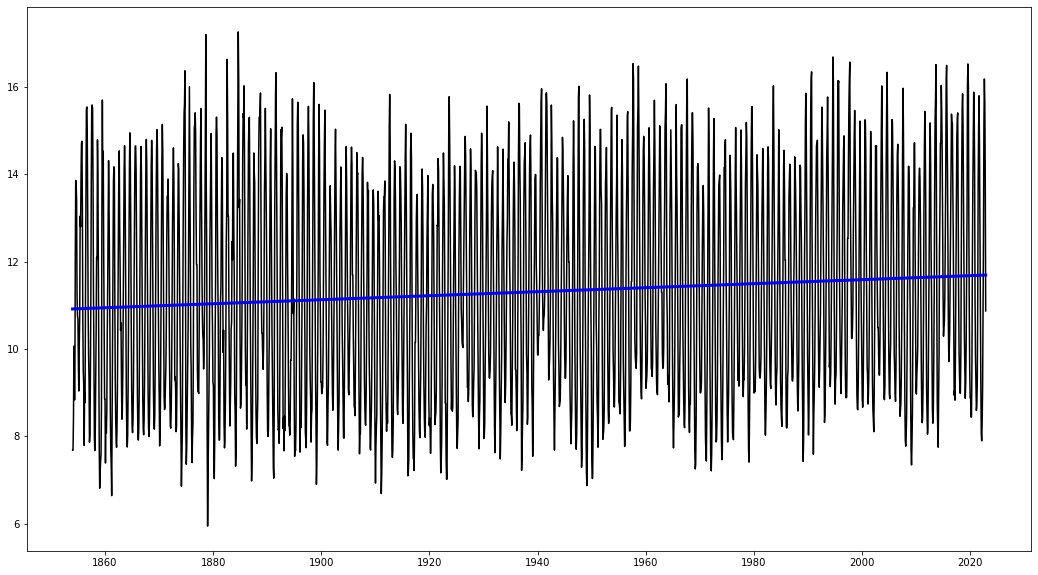

In [6]:
# The coefficients
print("Coefficients: \n", regr.coef_)

# The intercept
print("Intercept: \n", regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# Plot outputs
plt.figure(figsize=(18,10))
plt.plot(sst_reg.index, y, color="black")
plt.plot(sst_reg.index, y_pred, color="blue", linewidth=3)

plt.show()


Are you impressed? Maybe not too impressed yet - as we are not exactly fitting our data with a straight line (this is a periodic signal after all). You can see our $R^2$ and SSR are quite low and high respectively.  However in this case, we were not trying to fit our data as much as find a linear trend in our data - thsis shoudl allow us to remove the trend if we want to see what the data would look like without the effect of climate change!  Woah! 

In [7]:
#Add a column to our origional Pandas dataframe:
sst_reg['detrended - anomaly'] = y - y_pred

Text(0.5, 0, 'Time')

<Figure size 432x288 with 0 Axes>

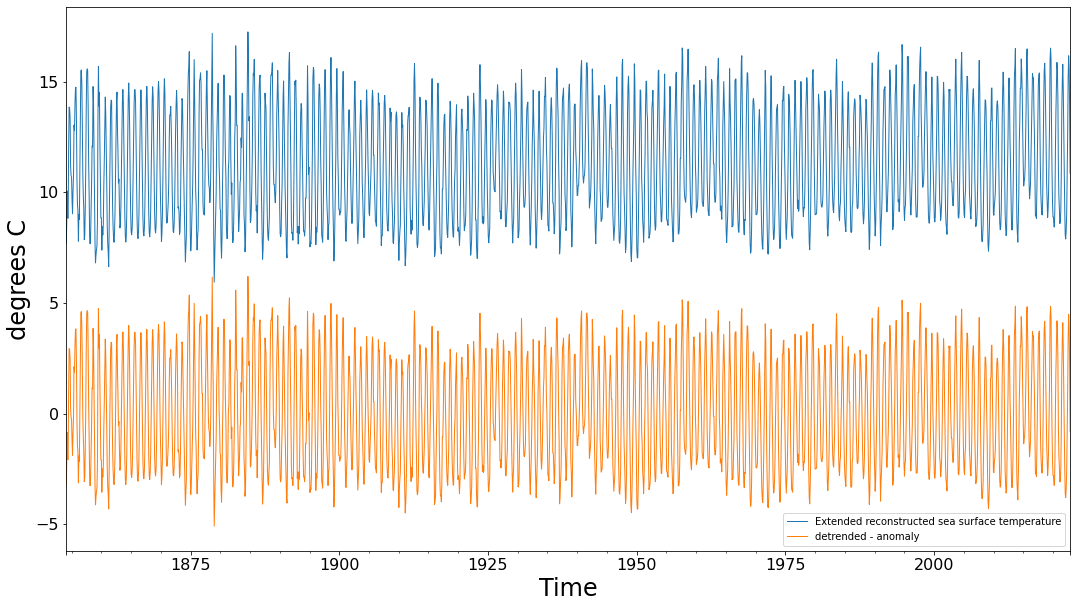

In [8]:
plt.figure()
ax1 = sst_reg.plot(figsize=(18,10),linewidth=1, fontsize=16)
ax1.set_ylabel('degrees C',fontdict={'fontsize':24})
ax1.set_xlabel('Time',fontdict={'fontsize':24})

Let's fix the plot so that we are comparing two anomalies relative to our first observations:


In [9]:
sst_reg[sst_reg.columns[0]][0:10]

Time
1854-01-01     7.682585
1854-01-31     7.682585
1854-03-02     8.468447
1854-04-01    10.065800
1854-05-01     8.840645
1854-05-31     8.840645
1854-06-30    11.998730
1854-07-30    13.861060
1854-08-29    13.793580
1854-09-28    13.401610
Freq: 30D, Name: Extended reconstructed sea surface temperature, dtype: float64

Text(0.5, 0, 'Time')

<Figure size 432x288 with 0 Axes>

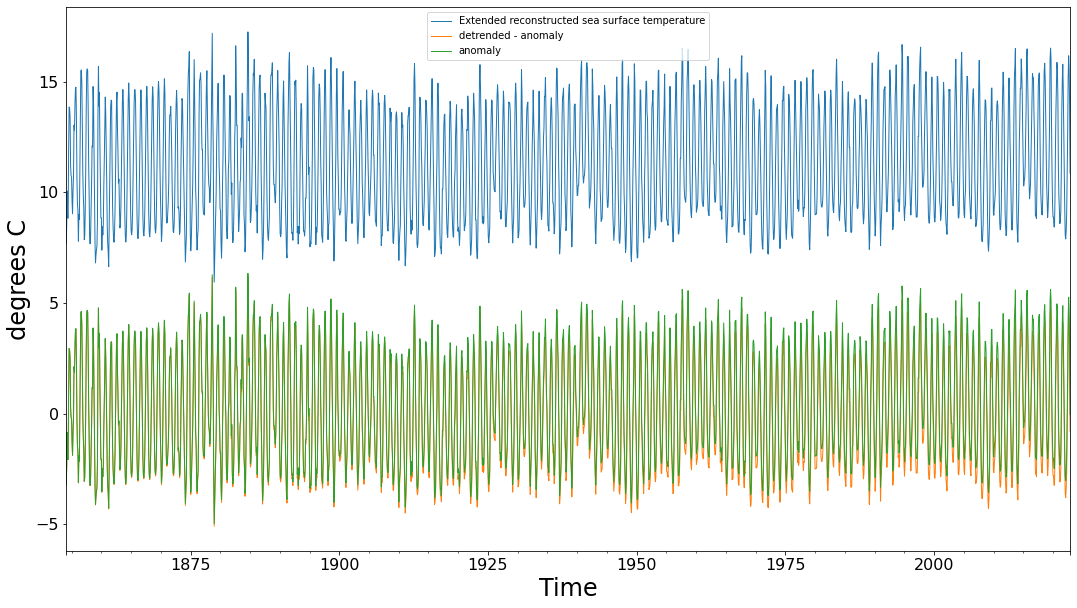

In [10]:
sst_reg['anomaly'] = sst_reg[sst_reg.columns[0]] - regr.intercept_
plt.figure()
ax1 = sst_reg.plot(figsize=(18,10),linewidth=1, fontsize=16)
ax1.set_ylabel('degrees C',fontdict={'fontsize':24})
ax1.set_xlabel('Time',fontdict={'fontsize':24})

## Doing more?

There are A LOT more data analysis tasks you can engage in relating to regression. Essentially modeling your data!  In the final optional assignment, you'll have the chance to play with a few other types of regressions including higher order, [polynomial regressions](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491), and [multivariate regressions](https://datatofish.com/multiple-linear-regression-python/).  We'll also practice training your regression on a portion of your data and testing your model on a different set of data. It wouldn't hurt to take a statistics class as well - but with data analysis tools at your disposal, you shoudl be able to play with real observational data as you learn - and explore your ability to model your data in the process. 